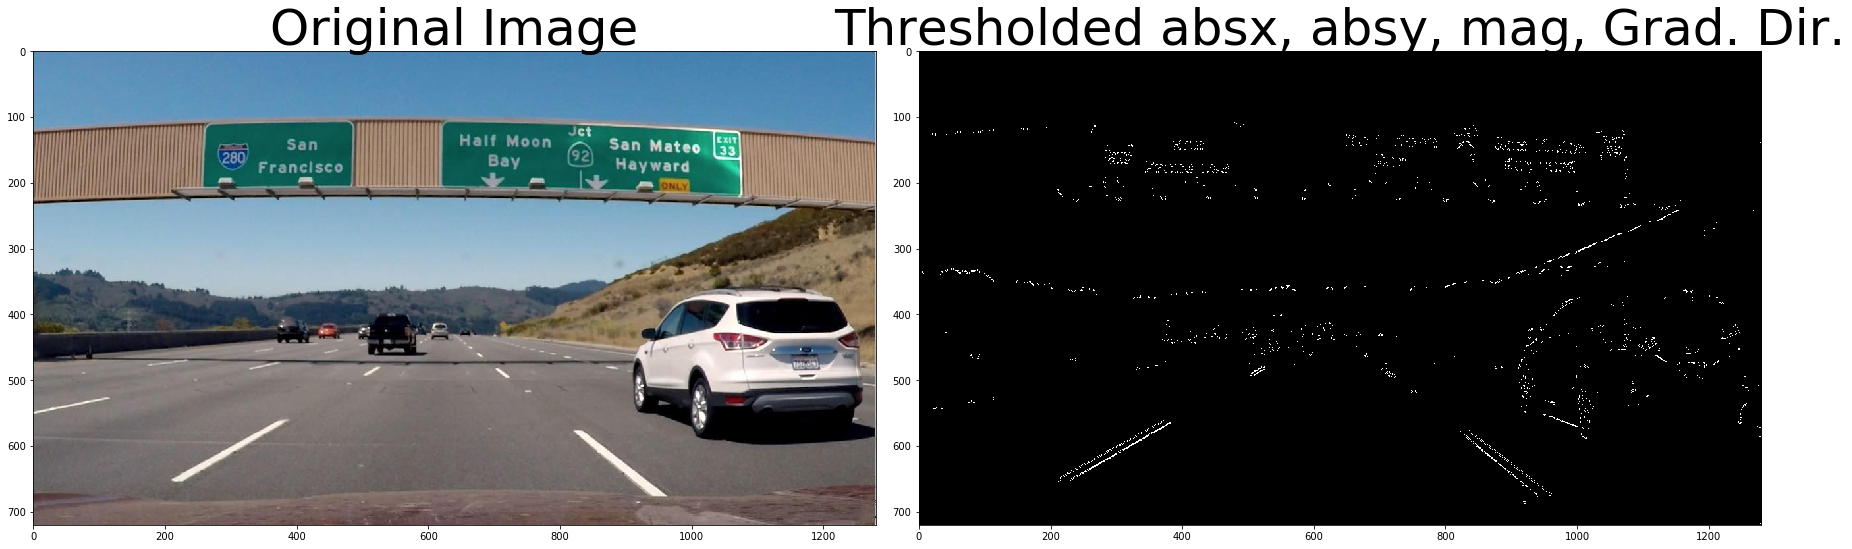

In [14]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pickle
import os

pwd = 'Gradients_Color_spaces/GradientNColorspaces'
image = mpimg.imread(os.path.join(pwd, 'signs_vehicles_xygrad.png'))

def abs_sobel_thresh(img, orient='x', thresh=(0, 255), ksize=3):
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobel_dir = cv2.Sobel(gray, cv2.CV_64F, np.uint8(orient == 'x'), 
                         np.uint8(orient == 'y'), ksize = ksize)
    abs_sobel = np.absolute(sobel_dir)
    scaled_sobel = np.uint8(255 * abs_sobel / np.max(abs_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > thresh[0]) & (scaled_sobel < thresh[1])] = 1
    return binary_output

def mag_thresh(img, sobel_kernel=3, mag_thresh=(0, 255)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Calculate the magnitude 
    # 4) Scale to 8-bit (0 - 255) and convert to type = np.uint8
    # 5) Create a binary mask where mag thresholds are met
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize=sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    mag_sobel = np.sqrt(np.square(sobelx) + np.square(sobely))
    scaled_sobel = np.uint8(255*mag_sobel / np.max(mag_sobel))
    binary_output = np.zeros_like(scaled_sobel)
    binary_output[(scaled_sobel > mag_thresh[0]) & (scaled_sobel < mag_thresh[1])] = 1
    return binary_output

def dir_threshold(img, sobel_kernel=3, thresh=(0, np.pi/2)):
    
    # Apply the following steps to img
    # 1) Convert to grayscale
    # 2) Take the gradient in x and y separately
    # 3) Take the absolute value of the x and y gradients
    # 4) Use np.arctan2(abs_sobely, abs_sobelx) to calculate the direction of the gradient 
    # 5) Create a binary mask where direction thresholds are met
    # 6) Return this mask as your binary_output image
    gray = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    sobelx = cv2.Sobel(gray, cv2.CV_64F, 1, 0, ksize = sobel_kernel)
    sobely = cv2.Sobel(gray, cv2.CV_64F, 0, 1, ksize = sobel_kernel)
    abs_sobelx = np.absolute(sobelx)
    abs_sobely = np.absolute(sobely)
    dir_grad = np.arctan2(abs_sobely, abs_sobelx)
    binary_output = np.zeros_like(dir_grad)
    binary_output[(dir_grad > thresh[0]) & (dir_grad < thresh[1])] = 1
    # binary_output = np.copy(img) # Remove this line
    return binary_output


ksize1 = 5
ksize2 = 5
ksize3 = 15
# Run the function
gradx_binary = abs_sobel_thresh(image, orient='x', thresh=(70, 100), ksize=ksize1)
grady_binary = abs_sobel_thresh(image, orient='y', thresh=(10, 20), ksize=ksize1)
mag_binary = mag_thresh(image, sobel_kernel=ksize2, mag_thresh=(70, 100))
dir_binary = dir_threshold(image, sobel_kernel=ksize3, thresh=(0.7, 1.3))

res_binary = np.zeros_like(dir_binary)
res_binary[((gradx_binary == 1) & (grady_binary == 1)) | ((mag_binary == 1) & (dir_binary == 1))] = 1
# Plot the result
f, (ax1, ax2) = plt.subplots(1, 2, figsize=(24, 9))
f.tight_layout()
ax1.imshow(image)
ax1.set_title('Original Image', fontsize=50)
ax2.imshow(res_binary, cmap='gray')
ax2.set_title('Thresholded absx, absy, mag, Grad. Dir.', fontsize=50)
plt.subplots_adjust(left=0., right=1, top=0.9, bottom=0.)

